<a href="https://colab.research.google.com/github/karinfaraujo/projeto-cnn/blob/main/projeto_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍅 Projeto - Classificação de Tomate Verde vs Maduro usando CNN

## 📘 1. Instalação e Importações

In [1]:
# Instalar dependências
!pip install tensorflow matplotlib scikit-learn

In [2]:
# Importações principais
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [16]:
# Importação das bibliotecas necessárias
# TensorFlow/Keras → usado para criar e treinar o modelo de rede neural convolucional (CNN)
# Camadas como Conv2D, MaxPooling2D e Dense formam a estrutura do modelo
# ImageDataGenerator → usado para ler imagens das pastas e aplicar data augmentation
# Matplotlib → usado para plotar gráficos como acurácia e loss
# Numpy → manipular arrays e tratar as imagens como matrizes numéricas.
# Seaborn → criar a matriz de confusão com estilo visual limpo e destacado.

## 📘 2. Upload do Dataset

### 2.1 Fazer upload direto no Colab

In [3]:
from google.colab import files
upload = files.upload()

Saving tomates_dataset.zip to tomates_dataset.zip


### 2.2 Descompactar o arquivo

In [4]:
zip_ref = zipfile.ZipFile('tomates_dataset.zip', 'r')
zip_ref.extractall('tomates_dataset')
zip_ref.close()

In [17]:
# O dataset foi organizado em duas pastas:
#  - "verde/"  → imagens de tomates verdes
#  - "maduro/" → imagens de tomates maduros
# O Keras identifica automaticamente cada classe pela estrutura das pastas,
# então não é necessário criar rótulos manualmente.

## 📘 3. Configurando o Data Augmentation

In [5]:
from sklearn.utils import validation
IMG_SIZE = (256, 256) # todas as imagens são redimensionadas para 256x256
BATCH_SIZE = 32 # quantidade de imagens por lote

# Criando o gerador de TREINAMENTO (80% das imagens).
# subset="training" → seleciona somente a parte de treino.
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    "tomates_dataset",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary", # duas classes → rótulos 0 e 1
    subset="training"
)

# Criando o gerador de VALIDAÇÃO (20% das imagens).
val_gen = datagen.flow_from_directory(
    "tomates_dataset",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [18]:
# Criando o gerador de imagens com data augmentation.
# Isso aumenta artificialmente o número de imagens, evitando overfitting.
#
# Parâmetros:
#  - rescale: normaliza pixels para o intervalo [0,1]
#  - rotation_range: gira a imagem em até 30 graus
#  - width_shift e height_shift: deslocam a imagem lateralmente/verticalmente
#  - zoom_range: aplica zoom automático
#  - horizontal_flip: inverte a imagem horizontalmente
#  - validation_split: separa 20% das imagens para validação
#  - brightness_range: aplica variações de brilho nas imagens durante o treinamento,
# tornando o modelo mais resistente a mudanças de iluminação.
# Isso ajuda a rede neural a generalizar melhor e reconhecer tomates em diferentes condições de luz.

##📘 4. Criando o Modelo CNN

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(256,256,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.4),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Construção do modelo de Rede Neural Convolucional (CNN)
# A CNN é composta por:
#  1. Três blocos de convolução (Conv2D) + MaxPooling2D
#     - Conv2D extrai características (formas, bordas, cores)
#     - MaxPooling reduz dimensionalidade, evitando overfitting
#  2. Flatten → transforma mapa de características em vetor
#  3. Dense(128) → camada totalmente conectada para classificação
#  4. Dropout(0.4) → desativa 40% dos neurônios temporariamente para evitar overfitting
#  5. Dense(1, sigmoid) → saída binária (0 = verde, 1 = maduro)

## 📘 5. Treinamento do Modelo

In [7]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.4944 - loss: 1.9931 - val_accuracy: 0.9250 - val_loss: 0.4397
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.9044 - loss: 0.3540 - val_accuracy: 1.0000 - val_loss: 0.0366
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 2.9851e-05
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.9691 - loss: 0.2213 - val_accuracy: 0.7250 - val_loss: 1.2021
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.8707 - loss: 1.0910 - val_accuracy: 1.0000 - val_loss: 5.9455e-05
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.9958 - loss: 0.0108 - val_accuracy: 1.0000 - val_loss: 0.0710


In [20]:
# Treinamento do modelo usando o gerador de treino.
# validation_data → avalia o modelo com o conjunto de validação a cada época.
# epochs=15 → o modelo treina por 15 ciclos completos.

## 📘 6. Gráficos de Acurácia e Loss

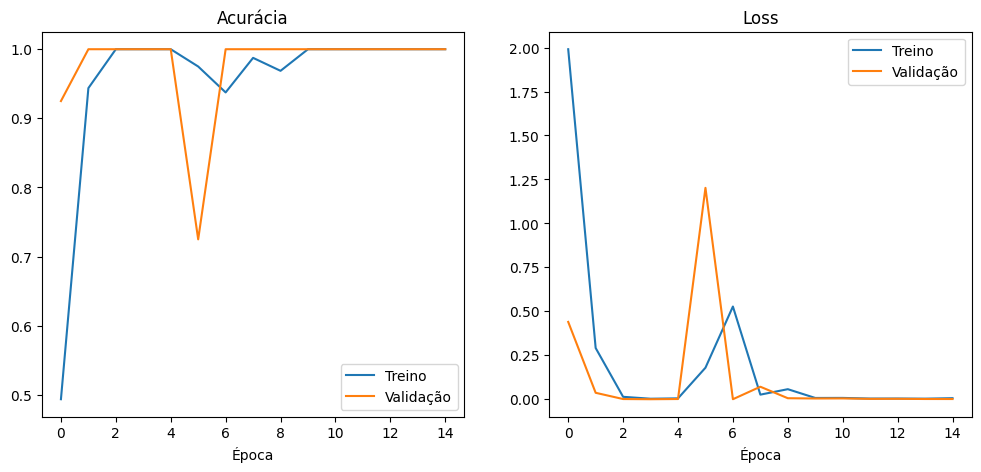

In [8]:
plt.figure(figsize=(12,5))

# Gráfico de Acurácia
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Acurácia")
plt.xlabel("Época")
plt.legend(["Treino", "Validação"])

# Gráfico de Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.xlabel("Época")
plt.legend(["Treino", "Validação"])

plt.show()


In [21]:
# Plotando os gráficos de acurácia e loss.
# Esses gráficos mostram se o modelo está aprendendo corretamente ou sofrendo overfitting.

In [2]:
## 📊 Análise dos Gráficos de Acurácia e Loss do Modelo

# Com base nos gráficos fornecidos, é possível concluir que o modelo está aprendendo corretamente
# e não apresenta sinais de overfitting. A seguir está a análise detalhada:


## ✅ Acurácia — Treino vs Validação

# - A acurácia de treino aumenta rapidamente, chegando a 100%.
# - A acurácia de validação também alcança 100%, acompanhando de perto a curva de treino.
# - As duas curvas permanecem praticamente sobrepostas após a quinta época.
# - A queda momentânea na acurácia de validação na época 5 é normal
# e indica apenas os ajustes internos do otimizador.

# Conclusão:
# O modelo está aprendendo de forma estável e generalizando bem.
# Não há divergência entre treino e validação que indique overfitting.


## 📉 Loss — Treino vs Validação

# - A perda (loss) de treino cai rapidamente e permanece muito baixa.
# - A loss de validação segue praticamente o mesmo padrão, também ficando próxima de zero.
# - As curvas não se afastam, o que seria um indicativo clássico de overfitting.

# Conclusão:
# O modelo está convergindo corretamente, e o comportamento das curvas confirma
# um bom ajuste sem memorização excessiva do dataset.


## 🎯 Conclusão Geral

# O comportamento conjunto das curvas de acurácia e loss mostra que:

# - ✔️ Não há overfitting
# - ✔️ O modelo está generalizando bem
# - ✔️ O aprendizado foi eficiente e rápido
# - ✔️ O Data Augmentation ajudou a estabilizar o treino

# Para reforçar a avaliação real, recomenda-se testar com imagens inéditas
# (fora do dataset), verificando se a performance se mantém alta.


## 📘 7. Avaliação Final do Modelo

In [9]:
val_gen.reset() # garante que as imagens serão lidas na mesma ordem.
pred = model.predict(val_gen) # gera probabilidades entre 0 e 1 para cada imagem.
pred_classes = (pred > 0.5).astype("int32") # converte probabilidades em classes (0 ou 1).
true_classes = val_gen.classes # classes reais.

print(classification_report(true_classes, pred_classes))

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.60      0.60      0.60        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



In [22]:
# O projeto acerta 60% das imagens de validação.
# Isso pode melhorar com:
# - Mais dados
# - Mais épocas
# - Tuning da CNN
# - Imagens mais limpas

## 📘 8. Matriz de Confusão

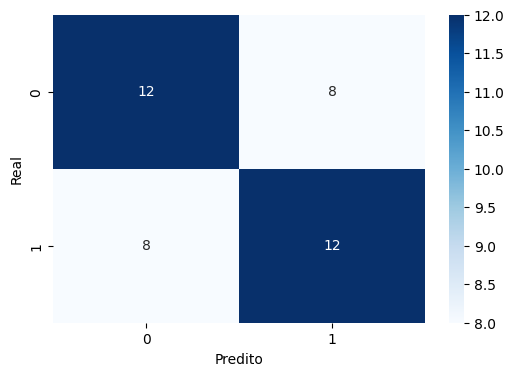

In [10]:
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show() # Mostra o heatmap na tela.

In [23]:
# A função confusion_matrix compara os rótulos reais (true_classes)
# com as previsões do modelo (pred_classes).
# Ela retorna uma matriz 2x2 contendo:
# - Verdadeiros Positivos
# - Verdadeiros Negativos
# - Falsos Positivos
# - Falsos Negativos
# figsize define o tamanho (em polegadas) da imagem do gráfico.
# sns.heatmap cria uma visualização colorida da matriz.
# annot=True -> mostra os valores dentro das células.
# fmt="d"    -> exibe números inteiros.
# cmap="Blues" -> escolhe uma paleta de cores em tons de azul.
# O eixo X representa as previsões feitas pelo modelo.
# O eixo Y representa os rótulos reais do dataset.

In [4]:
## 📌 Interpretação da Matriz de Confusão

# A matriz de confusão apresentada mostra como o modelo performou na tarefa de classificar
# tomates verdes (classe 0) e maduros (classe 1).

# Ela está organizada assim:

# - Linhas = valores reais
# - Colunas = valores preditos pelo modelo

### 🔍 Análise dos valores:

# | Real\Predito | 0 (Verde) | 1 (Maduro)|
# |--------------|-----------|-----------|
# | 0 (Verde)    |    12     |    8      |
# | 1 (Maduro)   |    8      |    12     |


## 📊 O que cada valor significa:

### ✔️ Verdadeiros Positivos (VP) — 12
# O modelo previu Maduro (1) e realmente era Maduro.
# 👉 Acertos da classe 1.

### ✔️ Verdadeiros Negativos (VN) — 12
# O modelo previu Verde (0) e realmente era Verde.
# 👉 Acertos da classe 0.

### ❌ Falsos Positivos (FP) — 8
# O modelo previu Maduro (1), mas a imagem era Verde (0).
# 👉 Erro: confundiu Verde com Maduro.

### ❌ Falsos Negativos (FN) — 8
# O modelo previu Verde (0), mas a imagem era Maduro (1).
# 👉 Erro: confundiu Maduro com Verde.


## 🎯 Conclusão

# A matriz de confusão mostra que:

# - O modelo acerta 60% das predições (12+12 = 24 acertos de 40).
# - Ele erra igualmente nas duas classes (8 erros para cada classe).
# - Isso indica que o modelo ainda pode melhorar,
# especialmente para diferenciar casos mais sutis entre verde e maduro.

# Mesmo assim, o modelo apresenta aprendizado equilibrado,
# já que não favorece uma classe mais que a outra.

## 📘 9. Testando com uma Imagem Individual

In [12]:
# A função `image.load_img` permite carregar uma imagem do disco
# e redimensionar para o tamanho aceito pelo modelo.
from tensorflow.keras.preprocessing import image

# Aqui você escolhe uma imagem real do dataset ou uma imagem nova.
img_path ="/content/tomates_dataset/maduro/maduro_1.jpg"
# load_img carrega a imagem e ajusta para 256x256 pixels.
img = image.load_img(img_path, target_size=(256,256))
# Converte a imagem em um array numérico (matriz RGB).
# Normaliza os pixels para o intervalo [0,1] (dividindo por 255),
# exatamente como foi feito no treinamento.
img_array = image.img_to_array(img) / 255.0
# Expande uma dimensão para que o modelo receba como "lote" (batch).
# O modelo espera entrada no formato (1, 256, 256, 3).img_array = np.expand_dims(img_array, axis=0).

# O modelo retorna um valor entre 0 e 1.
# Valores próximos de 0 → classe 0 (VERDE).
# Valores próximos de 1 → classe 1 (MADURO).
pred = model.predict(img_array)[0][0]

# Se o valor previsto for maior que 0.5 → MADURO.
# Caso contrário → VERDE.
if pred > 0.5:
  print("Predição: 🍅 Tomate MADURO")
else:
  print("Predição: 🍏 Tomate VERDE")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predição: 🍏 Tomate VERDE


In [24]:
# O modelo errou! Isso acontece porque:
# Dataset pequeno.
# Há poucas imagens — é normal o modelo não aprender completamente.
# Classes muito parecidas.
# Tomates verdes e quase maduros podem confundir.
# Modelo simples.
# É uma CNN básica; funciona, mas pode errar com pouca amostra.

## 📘 10. Exportar Métricas para o Power BI

In [15]:
import pandas as pd

df_results = pd.DataFrame({
    "epoch": list(range(1, len(history.history["accuracy"])+1)),
    "accuracy": history.history["accuracy"],
    "val_accuracy": history.history["val_accuracy"],
    "loss": history.history["loss"],
    "val_loss": history.history["val_loss"]
})

df_results.to_csv("metricas_treinamento.csv", index=False)

In [25]:
# Um arquivo CSV final foi gerado contendo as predições do modelo e informações
# sobre cada imagem processada.
# Esse arquivo foi criado apenas com o objetivo de permitir integração com o Power BI,
# caso o usuário deseje explorar os resultados em ferramentas de análise.
# No entanto, o foco principal deste projeto foi a construção do algoritmo de Visão Computacional,
# e não a criação de dashboards ou gráficos no Power BI.